### Import Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


### Reading Data

In [40]:
df=pd.read_csv('diabetes.csv')

### EDA

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [43]:
df.isna().apply(pd.value_counts).T

,False
Pregnancies,768
Glucose,768
BloodPressure,768
SkinThickness,768
Insulin,768
BMI,768
DiabetesPedigreeFunction,768
Age,768
Outcome,768


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
df.shape

(768, 9)

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [47]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Number of People suffering from Diabetes in the given data set are 268 and number of people not suffering from Diabetes are 500

In [48]:
df.groupby('Outcome').mean().T

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


By taking mean of all columns present in dataset, we can infer that Glucose level and Insulin Level is considerably high in people those are suffering from Diabetes

### Data Preparation

In [49]:
X=df.drop(['Outcome'],axis=1)


In [50]:
y=df[['Outcome']]

In [51]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [52]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


### Standardize 

In [53]:
std=StandardScaler()

In [54]:
X=std.fit_transform(X)

In [55]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


### Train Test Split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [57]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

### Support Vector Classifier

#### Hyperparameter Tuning

In [58]:
kernel=['linear','poly','rbf','sigmoid']
C=[1,2,3,4,5,6,7,8,9,10,100,1000]
degree=[1,2,3,4,5,6,7,8,9,10]
for i in kernel:
    for j in C:
        for k in degree:
            model=SVC(kernel=i,C=j,degree=k)
            model.fit(X_train,y_train)
            print("for kernel :",i)
            print("for C : ",j)
            print("for degree : ",k)
            print("Accuracy Score : ",model.score(X_test,y_test)*100)

for kernel : linear
for C :  1
for degree :  1
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  1
for degree :  2
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  1
for degree :  3
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  1
for degree :  4
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  1
for degree :  5
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  1
for degree :  6
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  1
for degree :  7
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  1
for degree :  8
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  1
for degree :  9
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  1
for degree :  10
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  2
for degree :  1
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  2
for degree :  2
Accuracy Score :  77.27272727272727
for

for kernel : linear
for C :  100
for degree :  1
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  100
for degree :  2
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  100
for degree :  3
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  100
for degree :  4
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  100
for degree :  5
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  100
for degree :  6
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  100
for degree :  7
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  100
for degree :  8
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  100
for degree :  9
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  100
for degree :  10
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  1000
for degree :  1
Accuracy Score :  77.27272727272727
for kernel : linear
for C :  1000
for degree :  2
Accuracy Scor

Accuracy Score :  66.88311688311688
for kernel : poly
for C :  9
for degree :  5
Accuracy Score :  68.83116883116884
for kernel : poly
for C :  9
for degree :  6
Accuracy Score :  66.88311688311688
for kernel : poly
for C :  9
for degree :  7
Accuracy Score :  66.23376623376623
for kernel : poly
for C :  9
for degree :  8
Accuracy Score :  68.18181818181817
for kernel : poly
for C :  9
for degree :  9
Accuracy Score :  67.53246753246754
for kernel : poly
for C :  9
for degree :  10
Accuracy Score :  68.18181818181817
for kernel : poly
for C :  10
for degree :  1
Accuracy Score :  77.27272727272727
for kernel : poly
for C :  10
for degree :  2
Accuracy Score :  72.72727272727273
for kernel : poly
for C :  10
for degree :  3
Accuracy Score :  66.23376623376623
for kernel : poly
for C :  10
for degree :  4
Accuracy Score :  66.88311688311688
for kernel : poly
for C :  10
for degree :  5
Accuracy Score :  68.18181818181817
for kernel : poly
for C :  10
for degree :  6
Accuracy Score :  68.

for kernel : rbf
for C :  7
for degree :  6
Accuracy Score :  72.07792207792207
for kernel : rbf
for C :  7
for degree :  7
Accuracy Score :  72.07792207792207
for kernel : rbf
for C :  7
for degree :  8
Accuracy Score :  72.07792207792207
for kernel : rbf
for C :  7
for degree :  9
Accuracy Score :  72.07792207792207
for kernel : rbf
for C :  7
for degree :  10
Accuracy Score :  72.07792207792207
for kernel : rbf
for C :  8
for degree :  1
Accuracy Score :  70.77922077922078
for kernel : rbf
for C :  8
for degree :  2
Accuracy Score :  70.77922077922078
for kernel : rbf
for C :  8
for degree :  3
Accuracy Score :  70.77922077922078
for kernel : rbf
for C :  8
for degree :  4
Accuracy Score :  70.77922077922078
for kernel : rbf
for C :  8
for degree :  5
Accuracy Score :  70.77922077922078
for kernel : rbf
for C :  8
for degree :  6
Accuracy Score :  70.77922077922078
for kernel : rbf
for C :  8
for degree :  7
Accuracy Score :  70.77922077922078
for kernel : rbf
for C :  8
for degree 

for kernel : sigmoid
for C :  5
for degree :  10
Accuracy Score :  68.83116883116884
for kernel : sigmoid
for C :  6
for degree :  1
Accuracy Score :  68.18181818181817
for kernel : sigmoid
for C :  6
for degree :  2
Accuracy Score :  68.18181818181817
for kernel : sigmoid
for C :  6
for degree :  3
Accuracy Score :  68.18181818181817
for kernel : sigmoid
for C :  6
for degree :  4
Accuracy Score :  68.18181818181817
for kernel : sigmoid
for C :  6
for degree :  5
Accuracy Score :  68.18181818181817
for kernel : sigmoid
for C :  6
for degree :  6
Accuracy Score :  68.18181818181817
for kernel : sigmoid
for C :  6
for degree :  7
Accuracy Score :  68.18181818181817
for kernel : sigmoid
for C :  6
for degree :  8
Accuracy Score :  68.18181818181817
for kernel : sigmoid
for C :  6
for degree :  9
Accuracy Score :  68.18181818181817
for kernel : sigmoid
for C :  6
for degree :  10
Accuracy Score :  68.18181818181817
for kernel : sigmoid
for C :  7
for degree :  1
Accuracy Score :  68.18181

Hyperparameter Tuning is done on the model and the best parameter are fed into the model

In [59]:
model=SVC(kernel='linear',C=1)

In [60]:
model.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [61]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

### Model Evaluation

In [62]:
accuracy_score(y_test,y_pred)

0.7727272727272727

In [63]:
model.score(X_train,y_train)

0.7866449511400652

In [64]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[91,  9],
       [26, 28]], dtype=int64)

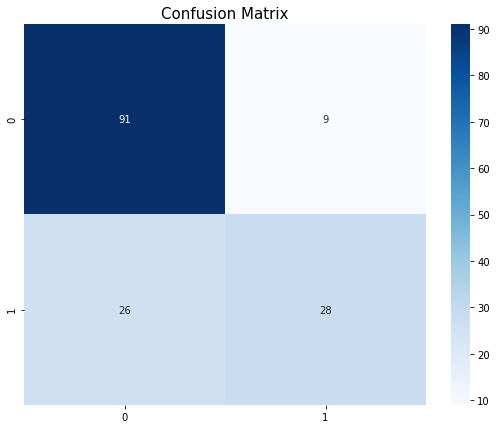

In [65]:
plt.figure(figsize=(9,7))
plt.title("Confusion Matrix",fontsize=15)
sns.heatmap(cf,cmap="Blues",annot=True,fmt='g')
plt.show()

After executing the code, we get 91+28=119 correct predictions and 9+26=35 incorrect predictions. The correctness of the model is 77%.

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



### Predictive System

In [67]:
input_data = (1,103,30,38,83,43.3,0.183,33)

# changing the input_data to numpy array
input_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_rshaped = input_array.reshape(1,-1)

# standardize the input data
std_data = std.transform(input_rshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')
    

[[-0.84488505 -0.56004775 -2.02166474  1.09545411  0.02778979  1.43512945
  -0.87244072 -0.0204964 ]]
[0]
The person is not diabetic
